In [1]:
from surprise.model_selection import train_test_split
from surprise import Dataset
import pandas as pd
from surprise import Reader
from surprise import SVD, KNNBasic
from surprise.model_selection import cross_validate
from sklearn.model_selection import train_test_split as sktrain_test_split
!pip install tabulate
import numpy as np
from surprise import accuracy
from surprise.model_selection import GridSearchCV


In [2]:
my_seed = 42
np.random.seed(my_seed)

### Data loading

In [3]:
ratings = pd.read_csv(r"C:\Users\sjlal\NYP\Project\FinalData\ratings.csv")
reader = Reader()
raw = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)


### Train and test set

In [4]:
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)


In [5]:
print("Number of ratings = ", ratings['userId'].count())
print("Number of Users = ", ratings['userId'].nunique())
print("Number of Movies = ", ratings['movieId'].nunique())

Number of ratings =  26024289
Number of Users =  270896
Number of Movies =  45115


In [6]:
print("trainset users= ", trainset.n_users)
print("trainset items= ", trainset.n_items)
print("trainset ratings= ", trainset.n_ratings)

nptestset = np.array(testset)
nptestset[:,1]
testsetn_items=len(np.unique(nptestset[:,1]))
testsetn_users=len(np.unique(nptestset[:,0]))
testsetn_ratings=len(nptestset)
    
print("testset users= ", testsetn_users)
print("testset items= ", testsetn_items)
print("testset ratings= ", testsetn_ratings)

trainset users=  268903
trainset items=  42277
trainset ratings=  18217002
testset users=  260692
testset items=  34994
testset ratings=  7807287


In [19]:
raw

print("Number of items:" + str(trainset.n_items))
print("Number of ratings:" + str(trainset.n_ratings))
print("Number of users:" + str(trainset.n_users))

#We use the all_ratings generator function to iterates through the user ratings
count = 1
for r in trainset.all_ratings():
  print(r)
  count += 1
  if count == 10:
    break

# Model Testing - Datasize

In [55]:
from collections import defaultdict

def get_top_n(predictions, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n



In [9]:
svd = SVD()
sample = 1000000
results = []

while sample <= 26024289:
    ratingsmini = ratings.sample(n=sample, replace=False, random_state=42)
    reader = Reader()
    rawmini = Dataset.load_from_df(ratingsmini[['userId','movieId','rating']],reader)
    trainset, testset = train_test_split(rawmini, test_size=.3, random_state=42, shuffle=True)
    svd.fit(trainset)
    predictions = svd.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    top_n = get_top_n(predictions, n=10)
    results.append(["n= ", sample, 'rmse= ', rmse, "mae= ", mae, top_n])
    #print(predictions)
    print("n= ", sample, 'rmse = ', rmse, "mae= ", mae)
    sample += 1000000


RMSE: 0.9259
MAE:  0.7138
n=  1000000 rmse =  0.9258868519283967 mae=  0.7138106412649886
RMSE: 0.9176
MAE:  0.7063
n=  2000000 rmse =  0.9176377651581048 mae=  0.7063452976985516
RMSE: 0.9134
MAE:  0.7024
n=  3000000 rmse =  0.9134298445837521 mae=  0.7024316722790432
RMSE: 0.9063
MAE:  0.6962
n=  4000000 rmse =  0.9063047214233658 mae=  0.6962006317187822
RMSE: 0.8991
MAE:  0.6894
n=  5000000 rmse =  0.8990608188698838 mae=  0.6893942009208841
RMSE: 0.8902
MAE:  0.6819
n=  6000000 rmse =  0.8901558920460005 mae=  0.6818708513847296
RMSE: 0.8823
MAE:  0.6752
n=  7000000 rmse =  0.8822746777736145 mae=  0.6751931701774123
RMSE: 0.8752
MAE:  0.6693
n=  8000000 rmse =  0.875222378288938 mae=  0.6692848295356636
RMSE: 0.8673
MAE:  0.6627
n=  9000000 rmse =  0.8672557858246193 mae=  0.6626947516369209
RMSE: 0.8611
MAE:  0.6574
n=  10000000 rmse =  0.8610719933078818 mae=  0.6573880024066661
RMSE: 0.8550
MAE:  0.6523
n=  11000000 rmse =  0.8549702366621125 mae=  0.6523174409329087
RMSE: 0.8

In [13]:
svd = SVD()
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_full = svd.test(testset)

In [ ]:
top_n = get_top_n(predictions_full, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

In [ ]:
nppredictions = np.array(predictions)

In [ ]:
nppredictions[:,4]

In [ ]:
#check unique
list({v['was_impossible']:v for v in nppredictions[:,4]}.values())


In [ ]:
results

In [66]:
npresults = np.array(results)

In [71]:
chart = npresults[:,:6]

In [ ]:
chart[:,5]

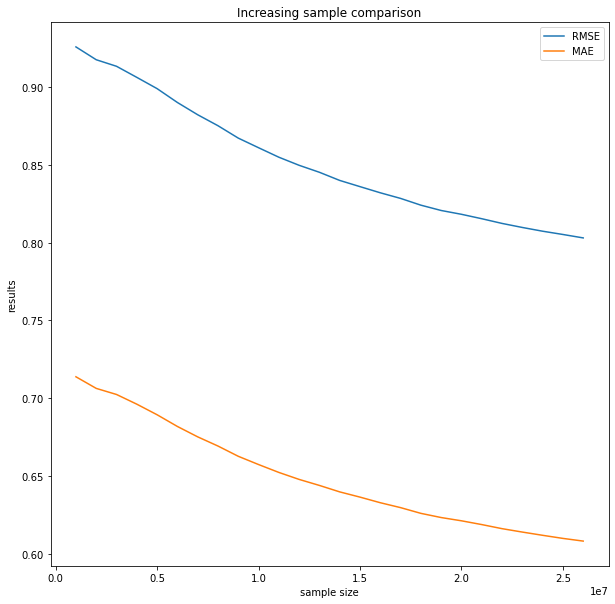

In [73]:
import matplotlib.pyplot as plt
x = chart[:,1]
y1 = chart[:,3]
y2 = chart[:,5]

plt.figure(figsize=[10,10])
plt.title('Increasing sample comparison')
plt.plot(x,y1,label="RMSE")
plt.plot(x,y2,label="MAE")
plt.legend()
plt.xlabel('sample size')
plt.ylabel('results')

plt.show()

In [ ]:
predictedresults = npresults[:,6]

In [ ]:
predictedresults.shape

In [ ]:
predictedresults[0]

In [ ]:
Individualresults = []
sampleindex = 0
for i in predictedresults:
    sampleindex += 1000000
    for uid, user_ratings in i.items():
        #Individualresults.append([uid , sampleindex , [iid for (iid, _) in user_ratings]])
        print(uid , sampleindex , [iid,pred for (iid, pred) in user_ratings])

In [ ]:
pd_Individualresults = pd.DataFrame(Individualresults, columns=['uid','samplesize','recommended movies'])

In [ ]:
pd_Individualresults[pd_Individualresults['uid'] == 113750]

In [ ]:
ratings[ratings['userId'] == 113750][ratings['movieId'] == 76093]

In [ ]:
pd_Individualresults.to_csv("Individualresults1.csv")

In [67]:
pd_results = pd.DataFrame(npresults)

In [ ]:
pd_results

In [68]:
pd_results.to_csv("results.csv")

In [69]:
pd_results.to_json("results.json")

In [23]:
from surprise.model_selection import train_test_split
from surprise import Dataset
import pandas as pd
from surprise import Reader
from surprise import SVD, KNNBasic
from surprise.model_selection import cross_validate
from sklearn.model_selection import train_test_split as sktrain_test_split

import numpy as np
from surprise import accuracy
from surprise.model_selection import GridSearchCV

sample = 1000000

grid = {'n_epochs': [5, 10, 15, 20, 25, 30], 
        'lr_all': [.001, .0025, .005, .0075, .01],
       'n_factors': [80, 90, 100, 110, 120]}

gs = GridSearchCV(SVD, grid, measures=['rmse', 'mae'], cv=5, n_jobs= -1)
ratingsmini = ratings.sample(n=sample, replace=False, random_state=42)
reader = Reader()
rawmini = Dataset.load_from_df(ratingsmini[['userId','movieId','rating']],reader)
gs.fit(rawmini)

print(gs.best_score['mae'])
print(gs.best_score['rmse'])
print(gs.best_params['mae'])
print(gs.best_params['rmse'])

0.7115954738901158
0.9229883921706896
{'n_epochs': 30, 'lr_all': 0.0025, 'n_factors': 80}
{'n_epochs': 30, 'lr_all': 0.0025, 'n_factors': 80}


In [5]:
results_df = pd.DataFrame.from_dict(gs.cv_results)

In [24]:
#insert from grid search cv best hyperparameters1 = 'n_epochs': 10, 'lr_all': 0.01, 'n_factors': 80
svd = SVD(n_epochs = 30, lr_all= 0.0025, n_factors = 80)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp1 = svd.test(testset)

In [28]:
accuracy.mae(predictions_full)
accuracy.rmse(predictions_full)

MAE:  0.6083
RMSE: 0.8036


0.8036035567837161

In [27]:
accuracy.mae(predictions_hp1)
accuracy.rmse(predictions_hp1)

MAE:  0.6134
RMSE: 0.8079


0.8078546856178647

In [29]:
#increase n_factors to 120 because it is a bigger dataset
svd = SVD(n_epochs = 30, lr_all= 0.0025, n_factors = 120)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp2 = svd.test(testset)

In [30]:
accuracy.mae(predictions_hp2)
accuracy.rmse(predictions_hp2)

MAE:  0.6131
RMSE: 0.8074


0.8074464685618028

In [31]:
# Previous gridsearch result {'n_epochs': 30, 'lr_all': 0.0025, 'n_factors': 80}
sample = 1000000

grid = {'n_epochs': [30, 35, 40], 
        'lr_all': [.0015, .0020, .0025, .003, .0035, .0040, .0045],
       'n_factors': [80, 90, 100, 110, 120]}

gs = GridSearchCV(SVD, grid, measures=['rmse', 'mae'], cv=5, n_jobs= -1)
ratingsmini = ratings.sample(n=sample, replace=False, random_state=42, )
reader = Reader()
rawmini = Dataset.load_from_df(ratingsmini[['userId','movieId','rating']],reader)
gs.fit(rawmini)

print(gs.best_score['mae'])
print(gs.best_score['rmse'])
print(gs.best_params['mae'])
print(gs.best_params['rmse'])

0.7119057726703276
0.9234525099674864
{'n_epochs': 30, 'lr_all': 0.0025, 'n_factors': 80}
{'n_epochs': 30, 'lr_all': 0.0025, 'n_factors': 80}


In [32]:
#increase n_factors to 120 because it is a bigger dataset and lr to 0.005
svd = SVD(n_epochs = 30, lr_all= 0.005, n_factors = 120)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp2 = svd.test(testset)

In [34]:
accuracy.mae(predictions_hp2)
accuracy.rmse(predictions_hp2)

MAE:  0.6062
RMSE: 0.8029


0.8029183219519608

In [33]:
sample = 1000000

grid = {'n_epochs': [5, 10, 15, 20, 25, 30], 
        'lr_all': [.005, .0075],
       'n_factors': [80, 90, 100, 110, 120],
       'reg_all': [0.01, 0.02, 0.03, 0.04]}

gs = GridSearchCV(SVD, grid, measures=['rmse', 'mae'], cv=5, n_jobs= -1)
ratingsmini = ratings.sample(n=sample, replace=False, random_state=42)
reader = Reader()
rawmini = Dataset.load_from_df(ratingsmini[['userId','movieId','rating']],reader)
gs.fit(rawmini)

print(gs.best_score['mae'])
print(gs.best_score['rmse'])
print(gs.best_params['mae'])
print(gs.best_params['rmse'])

0.7077145509168952
0.9186176816067846
{'n_epochs': 20, 'lr_all': 0.005, 'n_factors': 80, 'reg_all': 0.04}
{'n_epochs': 20, 'lr_all': 0.005, 'n_factors': 80, 'reg_all': 0.04}


In [36]:
results_df = pd.DataFrame.from_dict(gs.cv_results)

In [38]:
results_df.to_csv("gs_results1")

In [13]:
svd = SVD(n_epochs = 30, lr_all= 0.005, n_factors = 120, reg_all = 0.04)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp2 = svd.test(testset)

In [14]:
accuracy.mae(predictions_hp2)
accuracy.rmse(predictions_hp2)

MAE:  0.6080
RMSE: 0.8018


0.8018261432219392

In [15]:
svd = SVD(n_epochs = 30, lr_all= 0.005, n_factors = 120, reg_all = 0.03)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp3 = svd.test(testset)

In [16]:
accuracy.mae(predictions_hp3)
accuracy.rmse(predictions_hp3)

MAE:  0.6026
RMSE: 0.7966


0.7965559955032439

In [19]:
grid = {'n_epochs': [30,40], 
        'lr_all': [.005, .0075],
       'n_factors': [120,140],
       'reg_all': [0.03]}

gs = GridSearchCV(SVD, grid, measures=['rmse', 'mae'], cv=5, n_jobs= -1)
gs.fit(raw)

print(gs.best_score['mae'])
print(gs.best_score['rmse'])
print(gs.best_params['mae'])
print(gs.best_params['rmse'])

PicklingError: Could not pickle the task to send it to the workers.

In [20]:
#reg_all = 0.03 is ok, 
svd = SVD(n_epochs = 30, lr_all= 0.005, n_factors = 140, reg_all = 0.03)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp3 = svd.test(testset)
accuracy.mae(predictions_hp3)
accuracy.rmse(predictions_hp3)

MAE:  0.6025
RMSE: 0.7964


0.7964012536088895

In [21]:
#reg_all = 0.03 is ok, 
svd = SVD(n_epochs = 30, lr_all= 0.005, n_factors = 160, reg_all = 0.03)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp3 = svd.test(testset)
accuracy.mae(predictions_hp3)
accuracy.rmse(predictions_hp3)

MAE:  0.6024
RMSE: 0.7962


0.7961766315407934

In [22]:
#reg_all = 0.03 is ok, 
svd = SVD(n_epochs = 40, lr_all= 0.005, n_factors = 120, reg_all = 0.03)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp3 = svd.test(testset)
accuracy.mae(predictions_hp3)
accuracy.rmse(predictions_hp3)

MAE:  0.5997
RMSE: 0.7938


0.7938425763721314

In [23]:
#reg_all = 0.03 is ok, 
svd = SVD(n_epochs = 50, lr_all= 0.005, n_factors = 120, reg_all = 0.03)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp3 = svd.test(testset)
accuracy.mae(predictions_hp3)
accuracy.rmse(predictions_hp3)

MAE:  0.5996
RMSE: 0.7940


0.7940308037683161

In [25]:
#reg_all = 0.03 is ok, 
svd = SVD(n_epochs = 40, lr_all= 0.006, n_factors = 120, reg_all = 0.03)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp3 = svd.test(testset)
accuracy.mae(predictions_hp3)
accuracy.rmse(predictions_hp3)

MAE:  0.6006
RMSE: 0.7953


0.7953114865882829

In [26]:
#reg_all = 0.03 is ok, 
svd = SVD(n_epochs = 40, lr_all= 0.007, n_factors = 120, reg_all = 0.03)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp3 = svd.test(testset)
accuracy.mae(predictions_hp3)
accuracy.rmse(predictions_hp3)

MAE:  0.6020
RMSE: 0.7974


0.7973841896011495

In [27]:
#reg_all = 0.03 is ok, 
svd = SVD(n_epochs = 40, lr_all= 0.005, n_factors = 160, reg_all = 0.03)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp3 = svd.test(testset)
accuracy.mae(predictions_hp3)
accuracy.rmse(predictions_hp3)

MAE:  0.5996
RMSE: 0.7934


0.7934174203394091

In [28]:
#reg_all = 0.03 is ok, 
svd = SVD(n_epochs = 40, lr_all= 0.005, n_factors = 200, reg_all = 0.03)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp3 = svd.test(testset)
accuracy.mae(predictions_hp3)
accuracy.rmse(predictions_hp3)

MAE:  0.5998
RMSE: 0.7934


0.793401204589907

In [29]:
#reg_all = 0.03 is ok, 
svd = SVD(n_epochs = 40, lr_all= 0.005, n_factors = 180, reg_all = 0.03)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_hp3 = svd.test(testset)
accuracy.mae(predictions_hp3)
accuracy.rmse(predictions_hp3)

MAE:  0.5998
RMSE: 0.7935


0.7934918384803572

In [7]:
# The optimal model hyperparameters
svd = SVD(n_epochs = 40, lr_all= 0.005, n_factors = 160, reg_all = 0.03)
trainset, testset = train_test_split(raw, test_size=.3, random_state=42, shuffle=True)
svd.fit(trainset)
predictions_final = svd.test(testset)


In [95]:
svd.predict(101382, 7)

Prediction(uid=101382, iid=7, r_ui=None, est=3.2594692019154174, details={'was_impossible': False})

In [101]:
top_n = get_top_n(predictions_final, n=10)
recommendedmovies = []
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    recommendedmovies.append([uid, [iid for (iid, _) in user_ratings]])

In [102]:
predictions_final

[Prediction(uid=101382, iid=7, r_ui=3.0, est=3.529418812039672, details={'was_impossible': False}),
 Prediction(uid=70284, iid=2174, r_ui=4.0, est=3.830133940944196, details={'was_impossible': False}),
 Prediction(uid=87872, iid=2628, r_ui=4.0, est=3.6446337679975995, details={'was_impossible': False}),
 Prediction(uid=69691, iid=1036, r_ui=3.0, est=3.7727709743708626, details={'was_impossible': False}),
 Prediction(uid=95304, iid=300, r_ui=4.0, est=3.2679217715434272, details={'was_impossible': False}),
 Prediction(uid=123494, iid=912, r_ui=0.5, est=1, details={'was_impossible': False}),
 Prediction(uid=252050, iid=1093, r_ui=3.0, est=2.8897246467266027, details={'was_impossible': False}),
 Prediction(uid=63441, iid=1527, r_ui=5.0, est=4.746808441853841, details={'was_impossible': False}),
 Prediction(uid=164067, iid=355, r_ui=3.0, est=3.541810597565712, details={'was_impossible': False}),
 Prediction(uid=191886, iid=1784, r_ui=4.5, est=3.8002843147055, details={'was_impossible': Fals

In [103]:
np_prediction_final = np.array(predictions_final)

In [104]:
np.savetxt("np_prediction_final.csv", 
           np_prediction_final,
           delimiter =", ", 
           fmt ='% s')

In [105]:
nprecommendedmovies = np.array(recommendedmovies, dtype=object)
np.savetxt("nprecommendedmovies.csv", 
           nprecommendedmovies,
           header = "userid,recommendedmovies", 
           delimiter =", ",
           fmt ='% s')

In [106]:
recommendedmovies

[[101382, [858, 1221, 527, 953, 356, 1387, 608, 1304, 1267, 1210]],
 [70284, [1246, 2858, 4995, 3147, 1097, 1641, 17, 1784, 3408, 5669]],
 [87872, [2628, 912, 902, 2303, 355]],
 [69691, [3147, 6016, 3949, 5995, 4993, 1784, 110, 4011, 30707, 33794]],
 [95304, [908, 912, 926, 1204, 1254, 942, 1207, 6, 1344, 1193]],
 [123494, [318, 356, 1197, 912, 151707, 1196, 750, 2019, 296, 1252]],
 [252050, [1805, 3107, 3210, 849, 1093, 273]],
 [63441, [2324, 527, 1527, 2858, 1306, 1704, 32, 2628, 151, 1198]],
 [164067, [7, 539, 39, 410, 276, 296, 3, 355, 305, 380]],
 [191886, [1784, 3996, 3793]],
 [79039, [318, 4011, 2571, 4878, 3578]],
 [95135, [527, 1193, 1227, 356, 2571, 1209, 3252, 3198, 1204, 7147]],
 [41562, [296, 1148, 1285, 1199, 318, 745, 1288, 1214, 778, 265]],
 [108770, [858, 527, 1204, 1148, 745, 1207, 3114, 5060, 608, 1234]],
 [258021, [1997, 1228, 858, 1387, 1222, 5952, 3471, 3168, 1244, 2858]],
 [229359, [50, 4011, 4226, 858, 3147, 1193, 293, 3275, 1704, 5952]],
 [75291,
  [134130, 585

In [78]:
#n_epochs = 40, lr_all= 0.005, n_factors = 160, reg_all = 0.03
grid = {'n_epochs': [40], 
        'lr_all': [.005],
       'n_factors': [160],
       'reg_all': [0.03]}

gs = GridSearchCV(SVD, grid, measures=['rmse', 'mae'], cv=5, n_jobs= -1)
gs.fit(raw)

C:\Users\sjlal\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [107]:
from collections import defaultdict

def get_top_n_true(predictions, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, true_r))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [108]:
top_n = get_top_n(predictions_final, n=10)

In [109]:
top_n[101382]

[(858, 5),
 (1221, 5),
 (527, 4.972022872005428),
 (953, 4.914366560022257),
 (356, 4.770774117128234),
 (1387, 4.7277829118909125),
 (608, 4.704043763161815),
 (1304, 4.7040401608736),
 (1267, 4.641692362834787),
 (1210, 4.593495391203712)]

In [110]:
recommendedmovies = []
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    recommendedmovies.append([uid, [iid for (iid, _) in user_ratings]])

In [111]:
top_n_true = get_top_n_true(predictions_final, n=10)

In [112]:
truepreference = []
# Print the recommended items for each user
for uid, user_ratings in top_n_true.items():
    truepreference.append([uid, [iid for (iid, _) in user_ratings]])

In [113]:
print(recommendedmovies[0])
print(truepreference[0])

[101382, [858, 1221, 527, 953, 356, 1387, 608, 1304, 1267, 1210]]
[101382, [1210, 364, 1263, 527, 1276, 356, 1302, 858, 508, 1304]]


In [114]:
def top_n_accuracy(recommendedmovies,truepreference):
    
    uid = []
    score = []
    a = 0
    for i in recommendedmovies:
        x = 0
        y = 0
        
        for j in i[1]:            
            if j in truepreference[a][1]:
                x += 1
                y += 1
            else:
                y += 1
                
        acc = x/y
        a += 1
        uid.append(i[0])
        score.append(acc)
            
    return [sum(score)/len(score),uid,score]
            
                

In [115]:
prediction_score = top_n_accuracy(recommendedmovies,truepreference)

In [116]:
prediction_score[0]

0.7807301336442153

In [117]:
prediction_score[2]

[0.5,
 0.5,
 1.0,
 0.6,
 0.1,
 1.0,
 1.0,
 0.8,
 0.8,
 1.0,
 1.0,
 0.6,
 0.4,
 0.4,
 0.3,
 0.5,
 0.5,
 0.2,
 0.2,
 0.7,
 0.3,
 0.4,
 1.0,
 0.5,
 0.3,
 0.2,
 0.4,
 0.4,
 0.0,
 0.1,
 0.2,
 0.3,
 0.3,
 0.6,
 0.4,
 0.4,
 0.5,
 0.7,
 0.7,
 0.6,
 0.3,
 0.9,
 0.5,
 0.3,
 0.2,
 0.4,
 0.5,
 0.8,
 0.3,
 0.6,
 1.0,
 0.7,
 0.7,
 0.3,
 0.1,
 0.4,
 0.4,
 0.4,
 0.2,
 1.0,
 0.2,
 0.5,
 0.3,
 0.5,
 0.2,
 0.7,
 0.1,
 0.4,
 0.7,
 0.2,
 0.7,
 0.4,
 0.7,
 0.2,
 0.2,
 0.9,
 0.5,
 0.3,
 0.3,
 0.4,
 0.3,
 0.2,
 0.5,
 0.2,
 0.2,
 0.5,
 0.2,
 1.0,
 0.6,
 0.4,
 0.5,
 0.1,
 0.2,
 0.5,
 0.7,
 0.5,
 0.6,
 0.8,
 0.9,
 0.8,
 0.2,
 0.5,
 0.0,
 0.1,
 0.5,
 0.3,
 0.4,
 0.1,
 0.2,
 0.4,
 0.7,
 0.4,
 0.1,
 0.2,
 0.1,
 0.2,
 1.0,
 0.0,
 0.1,
 0.6,
 0.7,
 0.2,
 0.4,
 0.3,
 0.2,
 0.3,
 0.2,
 0.3,
 0.5,
 0.4,
 0.4,
 0.3,
 0.6,
 0.4,
 0.4,
 0.0,
 0.0,
 0.2,
 0.2,
 1.0,
 0.8,
 0.5,
 0.3,
 0.1,
 0.1,
 0.5,
 0.5,
 0.0,
 0.1,
 0.4,
 0.4,
 0.4,
 0.6,
 0.5,
 0.4,
 0.2,
 0.3,
 0.3,
 0.7,
 0.2,
 0.2,
 0.3,
 0.3,
 0.5,
 0.2,
 0.1,
 0.4

In [57]:
import pickle
with open("prediction_accuracy.txt", "wb") as fp:   #Pickling
    pickle.dump(prediction_score[2], fp)

with open("prediction_uid.txt", "wb") as fp:   #Pickling
    pickle.dump(prediction_score[1], fp)
    
#with open("test.txt", "rb") as fp:   # Unpickling
#b = pickle.load(fp)

In [8]:
movieids = ratings['movieId'].unique()
userids = ratings['userId'].unique()

In [61]:
movieids

array([   110,    147,    858, ..., 165649, 171051, 171221], dtype=int64)

In [97]:
all_predict = []
for i in movieids:
        all_predict.append(svd.predict(101382, i))

In [150]:
all_predict

[Prediction(uid=101382, iid=110, r_ui=None, est=4.420655944801733, details={'was_impossible': False}),
 Prediction(uid=101382, iid=147, r_ui=None, est=3.7236258885416, details={'was_impossible': False}),
 Prediction(uid=101382, iid=858, r_ui=None, est=5, details={'was_impossible': False}),
 Prediction(uid=101382, iid=1221, r_ui=None, est=5, details={'was_impossible': False}),
 Prediction(uid=101382, iid=1246, r_ui=None, est=4.345117297203719, details={'was_impossible': False}),
 Prediction(uid=101382, iid=1968, r_ui=None, est=4.140010160897235, details={'was_impossible': False}),
 Prediction(uid=101382, iid=2762, r_ui=None, est=4.343817840981169, details={'was_impossible': False}),
 Prediction(uid=101382, iid=2918, r_ui=None, est=4.245953830061639, details={'was_impossible': False}),
 Prediction(uid=101382, iid=2959, r_ui=None, est=4.138447720547059, details={'was_impossible': False}),
 Prediction(uid=101382, iid=4226, r_ui=None, est=4.196286926224249, details={'was_impossible': False}

In [125]:
user101382movie5results = get_top_n(all_predict,n=10)

In [132]:
user101382movie5results

defaultdict(list,
            {101382: [(858, 5),
              (1221, 5),
              (1097, 5),
              (260, 4.977891434033649),
              (527, 4.918608089054963),
              (2028, 4.909324110426823),
              (912, 4.905609121316953),
              (1193, 4.898487125892857),
              (111, 4.884755531562192),
              (1196, 4.861945850044397)]})

In [126]:
user101382movie5real = ratings[ratings['userId'] == 101382][ratings['rating'] == 5].sort_values('rating',ascending=False)['movieId']

<ipython-input-126-176fc46d9574>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user101382movie5real = ratings[ratings['userId'] == 101382][ratings['rating'] == 5].sort_values('rating',ascending=False)['movieId']


In [127]:
user101382movie5reallist = user101382movie5real.to_list()

In [151]:
user101382movie5reallist

[111,
 141,
 1196,
 1198,
 1204,
 1206,
 1210,
 1221,
 1228,
 1230,
 1231,
 1234,
 1244,
 1247,
 1250,
 1259,
 1263,
 1267,
 1276,
 1293,
 1302,
 1304,
 1307,
 1193,
 1185,
 1097,
 508,
 150,
 224,
 260,
 318,
 356,
 364,
 377,
 480,
 500,
 527,
 1094,
 590,
 593,
 596,
 838,
 858,
 924,
 1079,
 1084,
 1090,
 5060]

In [134]:
user101382movie5resultslist = []
# Append the recommended items for each user
for uid, user_ratings in user101382movie5results.items():
    user101382movie5resultslist.append([uid, [iid for (iid, _) in user_ratings]])

In [143]:
user101382movie5resultslist[0][1]

[858, 1221, 1097, 260, 527, 2028, 912, 1193, 111, 1196]

In [144]:
score = []
for i in user101382movie5resultslist[0][1]:
    x = 0
    y = 0
    if i in user101382movie5reallist:
        x += 1
        y += 1
    else:
        y += 1
        
    acc = x/y
    score.append(acc)
            
print(sum(score)/len(score))

0.8


In [157]:
score

[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]

In [156]:
ratings.groupby(['userId']).count()

,movieId,rating,timestamp
userId,,,
1,27,27,27
2,22,22,22
3,10,10,10
4,62,62,62
5,26,26,26
...,...,...,...
270892,75,75,75
270893,190,190,190
270894,148,148,148


In [161]:
pd.DataFrame(testset, columns=['userId','movieId','rating']).groupby(['userId']).count()

,movieId,rating
userId,,
1,7,7
2,7,7
3,2,2
4,23,23
5,11,11
...,...,...
270892,23,23
270893,55,55
270894,44,44


In [164]:
#top 10 vs ratings = 5, whole dataset
testing for all_predict = []
for i in movieids:
        all_predict.append(svd.predict(270893, i))

user270893movie5results = get_top_n(all_predict,n=10)
user270893movie5real = ratings[ratings['userId'] == 270893][ratings['rating'] == 5].sort_values('rating',ascending=False)['movieId']
user270893movie5reallist = user270893movie5real.to_list()
user270893movie5resultslist = []
# Append the recommended items for each user
for uid, user_ratings in user270893movie5results.items():
    user270893movie5resultslist.append([uid, [iid for (iid, _) in user_ratings]])
    
score = []
for i in user270893movie5resultslist[0][1]:
    x = 0
    y = 0
    if i in user270893movie5reallist:
        x += 1
        y += 1
    else:
        y += 1
        
    acc = x/y
    score.append(acc)
            
print(sum(score)/len(score))

0.4


<ipython-input-164-06342923e826>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user270893movie5real = ratings[ratings['userId'] == 270893][ratings['rating'] == 5].sort_values('rating',ascending=False)['movieId']


In [62]:
all_predict = []
username = 270893

movies_watched = []
for r in trainset.all_ratings():
  if r[0] == trainset.to_inner_uid(username):
    movies_watched.append(trainset.to_raw_iid(r[1]))

movies_watched_all = list(ratings[ratings['userId'] == username]['movieId'])

movies_watched_later = []
for i in testset:
    if i[0] == username:
        movies_watched_later.append(i[1])

movie_not_watched = list(movieids)

for i in movies_watched:
    movie_not_watched.remove(i)

for i in movie_not_watched:
    all_predict.append(svd.predict(username, i))
    

user_movie_results = get_top_n(all_predict,n=10)
user_movie_results_list = []

# Append the recommended items for each user
for uid, user_ratings in user_movie_results.items():
    user_movie_results_list.append([uid, [iid for (iid, _) in user_ratings]])
    
score = []
for i in user_movie_results_list[0][1]:
    x = 0
    y = 0
    if i in movies_watched_later:
        x += 1
        y += 1
    else:
        y += 1
        
    acc = x/y
    score.append(acc)
            
print(sum(score)/len(score))

0.0


In [70]:
user_movie_results_list

[[270893, [858, 1221, 2959, 33794, 58559, 260, 1097, 3578, 296, 541]]]

In [74]:
movies_watched_later

[70,
 157,
 407,
 593,
 724,
 799,
 1128,
 1196,
 1214,
 1222,
 1258,
 1261,
 1265,
 1334,
 1342,
 1388,
 1407,
 1601,
 1690,
 1771,
 1845,
 1954,
 1970,
 1973,
 1974,
 1985,
 1987,
 2000,
 2003,
 2028,
 2081,
 2121,
 2148,
 2149,
 2174,
 2338,
 2427,
 2553,
 2613,
 2746,
 2747,
 2815,
 2901,
 2918,
 3017,
 3034,
 3081,
 3740,
 3908,
 3917,
 4034,
 4226,
 4262,
 4270,
 4361]

In [13]:
trainset.to_raw_uid(101382)

82835

In [21]:
movieswatched = []
for r in trainset.all_ratings():
  if r[0] == trainset.to_inner_uid(270893):
    movieswatched.append(trainset.to_raw_iid(r[1]))


In [23]:
len(movieswatched)

135

In [47]:
movieswatchedall = list(ratings[ratings['userId'] == 270893]['movieId'])

In [26]:
movieswatchedlater = []
for i in testset:
    if i[0] == 270893:
        movieswatchedlater.append(i[1])

In [28]:
len(movieswatchedlater)

55

In [43]:
moviescheck = movieswatchedlater + movieswatched
moviescheck.sort()
moviescheck

[1,
 34,
 47,
 50,
 70,
 110,
 157,
 165,
 196,
 312,
 318,
 327,
 330,
 332,
 366,
 382,
 407,
 431,
 435,
 520,
 527,
 532,
 593,
 606,
 724,
 733,
 742,
 750,
 780,
 799,
 879,
 891,
 913,
 968,
 1027,
 1028,
 1036,
 1073,
 1090,
 1128,
 1130,
 1136,
 1168,
 1193,
 1196,
 1197,
 1200,
 1208,
 1210,
 1214,
 1215,
 1219,
 1222,
 1233,
 1242,
 1258,
 1259,
 1261,
 1265,
 1270,
 1320,
 1327,
 1333,
 1334,
 1342,
 1345,
 1347,
 1350,
 1370,
 1387,
 1388,
 1394,
 1407,
 1500,
 1517,
 1601,
 1645,
 1655,
 1676,
 1690,
 1717,
 1732,
 1748,
 1771,
 1845,
 1954,
 1968,
 1970,
 1973,
 1974,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1991,
 1994,
 1997,
 2000,
 2003,
 2026,
 2028,
 2078,
 2081,
 2107,
 2119,
 2121,
 2122,
 2148,
 2149,
 2167,
 2174,
 2279,
 2288,
 2328,
 2338,
 2355,
 2366,
 2389,
 2395,
 2407,
 2416,
 2427,
 2428,
 2451,
 2455,
 2517,
 2525,
 2542,
 2553,
 2596,
 2606,
 2613,
 2617,
 2664,
 2710,
 2713,
 2716,
 2717,
 2746,
 2747,
 2791,
 2797,
 2804,
 2815,
 2826,
 2858,
 289

In [48]:
movieswatchedall

[1,
 34,
 47,
 50,
 70,
 110,
 157,
 165,
 196,
 312,
 318,
 327,
 330,
 332,
 366,
 382,
 407,
 431,
 435,
 520,
 527,
 532,
 593,
 606,
 724,
 733,
 742,
 750,
 780,
 799,
 879,
 891,
 913,
 968,
 1027,
 1028,
 1036,
 1073,
 1090,
 1128,
 1130,
 1136,
 1168,
 1193,
 1196,
 1197,
 1200,
 1208,
 1210,
 1214,
 1215,
 1219,
 1222,
 1233,
 1242,
 1258,
 1259,
 1261,
 1265,
 1270,
 1320,
 1327,
 1333,
 1334,
 1342,
 1345,
 1347,
 1350,
 1370,
 1387,
 1388,
 1394,
 1407,
 1500,
 1517,
 1601,
 1645,
 1655,
 1676,
 1690,
 1717,
 1732,
 1748,
 1771,
 1845,
 1954,
 1968,
 1970,
 1973,
 1974,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1991,
 1994,
 1997,
 2000,
 2003,
 2026,
 2028,
 2078,
 2081,
 2107,
 2119,
 2121,
 2122,
 2148,
 2149,
 2167,
 2174,
 2279,
 2288,
 2328,
 2338,
 2355,
 2366,
 2389,
 2395,
 2407,
 2416,
 2427,
 2428,
 2451,
 2455,
 2517,
 2525,
 2542,
 2553,
 2596,
 2606,
 2613,
 2617,
 2664,
 2710,
 2713,
 2716,
 2717,
 2746,
 2747,
 2791,
 2797,
 2804,
 2815,
 2826,
 2858,
 289

In [49]:
moviescheck == movieswatchedall

True

In [77]:
usernamelist = [101382,70284,69691]
for username in usernamelist:
    all_predict = []

    movies_watched = []
    for r in trainset.all_ratings():
        if r[0] == trainset.to_inner_uid(username):
            movies_watched.append(trainset.to_raw_iid(r[1]))

    movies_watched_all = list(ratings[ratings['userId'] == username]['movieId'])

    movies_watched_later = []
    for i in testset:
        if i[0] == username:
            movies_watched_later.append(i[1])

    movie_not_watched = list(movieids)

    for i in movies_watched:
        movie_not_watched.remove(i)

    for i in movie_not_watched:
        all_predict.append(svd.predict(username, i))


    user_movie_results = get_top_n(all_predict,n=10)
    user_movie_results_list = []

    # Append the recommended items for each user
    for uid, user_ratings in user_movie_results.items():
        user_movie_results_list.append([uid, [iid for (iid, _) in user_ratings]])

    score = []
    for i in user_movie_results_list[0][1]:
        x = 0
        y = 0
        if i in movies_watched_later:
            x += 1
            y += 1
        else:
            y += 1

        acc = x/y
        score.append(acc)

    print(username, " = ", sum(score)/len(score))

101382  =  0.4
70284  =  0.0
69691  =  0.2


In [100]:
usernamelist = list(userids)
usernamelist = usernamelist[:100]
combinedscore = []
errorlist = []

all_inner_id = []
for r in trainset.all_users():
    all_inner_id.append(r)
    
all_raw_id = []
for r in all_inner_id:
    all_raw_id.append(trainset.to_raw_uid(r))

for username in usernamelist:
    if username not in all_raw_id: #error handler
        errorlist.append(username)
    elif username in all_raw_id:
        all_predict = []

        movies_watched = []
        for r in trainset.all_ratings():
            if r[0] == trainset.to_inner_uid(username):
                movies_watched.append(trainset.to_raw_iid(r[1]))

        movies_watched_all = list(ratings[ratings['userId'] == username]['movieId'])

        movies_watched_later = []
        for i in testset:
            if i[0] == username:
                movies_watched_later.append(i[1])

        movie_not_watched = list(movieids)

        for i in movies_watched:
            movie_not_watched.remove(i)

        for i in movie_not_watched:
            all_predict.append(svd.predict(username, i))


        user_movie_results = get_top_n(all_predict,n=10)
        user_movie_results_list = []

        # Append the recommended items for each user
        for uid, user_ratings in user_movie_results.items():
            user_movie_results_list.append([uid, [iid for (iid, _) in user_ratings]])

        score = []
        for i in user_movie_results_list[0][1]:
            x = 0
            y = 0
            if i in movies_watched_later:
                x += 1
                y += 1
            else:
                y += 1

            acc = x/y
            score.append(acc)
        combinedscore.append(sum(score)/len(score))
    
print(sum(combinedscore)/len(combinedscore))

0.08686868686868685


In [91]:
for r in trainset.all_users():
  print(r)
  count += 1
  if count == 10:
    break

0
1
2
3
4
5
6
7
8
9


In [94]:
all_inner_id = []
for r in trainset.all_users():
    all_inner_id.append(r)
    
all_raw_id = []
for r in all_inner_id:
    all_raw_id.append(trainset.to_raw_uid(r))

In [118]:
usernamelist = list(userids)
usernamelist = usernamelist[:1000]
combinedscore = []
errorlist = []

all_inner_id = []
for r in trainset.all_users():
    all_inner_id.append(r)
    
all_raw_id = []
for r in all_inner_id:
    all_raw_id.append(trainset.to_raw_uid(r))

for username in usernamelist:
    if username not in all_raw_id: #error handler
        errorlist.append(username)
    elif username in all_raw_id:
        all_predict = []

        movies_watched = []
        for r in trainset.all_ratings():
            if r[0] == trainset.to_inner_uid(username):
                movies_watched.append(trainset.to_raw_iid(r[1]))

        movies_watched_all = list(ratings[ratings['userId'] == username]['movieId'])

        movies_watched_later = []
        for i in testset:
            if i[0] == username:
                movies_watched_later.append(i[1])

        movie_not_watched = list(movieids)

        for i in movies_watched:
            movie_not_watched.remove(i)

        for i in movie_not_watched:
            all_predict.append(svd.predict(username, i))


        user_movie_results = get_top_n(all_predict,n=10)
        user_movie_results_list = []

        # Append the recommended items for each user
        for uid, user_ratings in user_movie_results.items():
            user_movie_results_list.append([uid, [iid for (iid, _) in user_ratings]])

        score = []
        for i in user_movie_results_list[0][1]:
            x = 0
            y = 0
            if i in movies_watched_later:
                x += 1
                y += 1
            else:
                y += 1

            acc = x/y
            score.append(acc)
        combinedscore.append(sum(score)/len(score))
    
print(sum(combinedscore)/len(combinedscore))

0.06431451612903247


In [120]:
combinedscore

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 0.1,
 0.4,
 0.0,
 0.1,
 0.2,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 0.2,
 0.1,
 0.0,
 0.3,
 0.0,
 0.0,
 0.3,
 0.1,
 0.0,
 0.3,
 0.0,
 0.4,
 0.0,
 0.5,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.2,
 0.0,
 0.6,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 0.0,
 0.2,
 0.1,
 0.0,
 0.5,
 0.1,
 0.0,
 0.4,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.1,
 0.3,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.6,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.3,
 0.0,
 0.1,
 0.3,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.1,
 0.0,
 0.0,
 0.1,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.2,
 0.4,
 0.1,
 0.0,
 0.4,
 0.1,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.1,
 0.0,
 0.3,
 0.0,
 0.0,
 0.0